<a href="https://colab.research.google.com/github/josivaniaoliveira/InterfaceClassifica-o/blob/main/HotelReservationsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Reservations Dataset**
---

# Observações do trabalho:

O algoritmo que melhor performou nesta base de dados foi o DecisionTree, e o segundo melhor foi o Rede Neural - MPL Classifier. 

Eu tentei prever o quanto que um hospede gostou da hospedagem do hotel a ponto de retornar demais vezes, utilizando o atributo **"repeated_reguest"** que significa se o cliente é um hospede recorrente ou não.

# Exportar um modelo

In [ ]:
import pickle
with open('modelo.pkl', 'wb') as file:
    pickle.dump(modelo_tree, file)

In [ ]:
from google.colab import files
files.download('modelo.pkl')

# Importar um modelo

In [ ]:
arquivo = files.upload()

In [ ]:
with open('modelo.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
pred = model.predict([[0.8,0.8,0.2,0.8]])
pred[0]

# Importação da base de dados

## Hotel Reservations Dataset



In [ ]:
import pandas as pd
url='https://drive.google.com/file/d/1dVBXFLPFElEzi3WOGv3o2kgsUIK3qbtg/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

# Análise dos dados

## Descrição dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Sobre este arquivo
O arquivo contém os diferentes atributos dos detalhes da reserva dos clientes. O dicionário de dados detalhado é dado abaixo.

**Dicionário de dados**

* **Booking_ID:** identificador único de cada reserva
* **no_of_adults:** Número de adultos
* **no_of_children:** Número de filhos
* **no_of_weekend_nights:** Número de noites de fim de semana (sábado ou domingo) que o hóspede ficou ou reservou para ficar no hotel
* **no_of_week_nights:** Número de noites da semana (segunda a sexta) que o hóspede se hospedou ou reservou para ficar no hotel
* **type_of_meal_plan:** Tipo de plano alimentar reservado pelo cliente:
* **required_car_parking_space:** O cliente precisa de uma vaga de estacionamento? (0 - Não, 1- Sim)
* **room_type_reried:** Tipo de quarto reservado pelo cliente. Os valores são cifrados (codificados) pela INN Hotels.
* **lead_time:** Número de dias entre a data da reserva e a data de chegada
* **chegada_ano:** Ano da data de chegada
* **chegada_mês:** Mês da data de chegada
* **chegada_data:** Data do mês
* **market_segment_type:** Designação do segmento de mercado.
* **repeat_guest:** O cliente é um hóspede recorrente? (0 - Não, 1- Sim)
* **no_of_previous_cancellations:** Número de reservas anteriores que foram canceladas pelo cliente antes da reserva atual
* **no_of_previous_bookings_not_canceled:** Número de reservas anteriores não canceladas pelo cliente antes da reserva atual
* **avg_price_per_room:** Preço médio por dia da reserva; os preços dos quartos são dinâmicos. (em euros)
* **no_of_special_requests:** Número total de pedidos especiais feitos pelo cliente (por exemplo, andar alto, vista do quarto, etc)
* **booking_status:** Flag indicando se a reserva foi cancelada ou não.

## Análise

### 0 - Booking ID

In [ ]:
df.Booking_ID.value_counts(ascending=True)

INN00001    1
INN24193    1
INN24192    1
INN24191    1
INN24190    1
           ..
INN12093    1
INN12094    1
INN12095    1
INN12089    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

In [ ]:
df.Booking_ID.isnull().sum()

0

In [ ]:
df['Booking_ID'].value_counts().plot(kind="pie")

In [ ]:
df['Booking_ID'].value_counts(ascending=True).plot(kind="bar")

### 1 - No of adults

In [ ]:
df.no_of_adults.isnull().sum()

0

In [ ]:
df.no_of_adults.value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

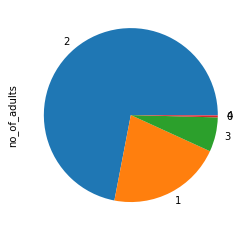

In [ ]:
df['no_of_adults'].value_counts().plot(kind="pie")

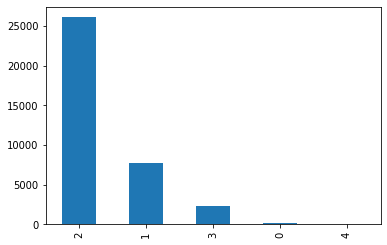

In [ ]:
df['no_of_adults'].value_counts().plot(kind="bar")

### 2 - No of children

In [ ]:
df.no_of_children.isnull().sum()

0

In [ ]:
df.no_of_children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

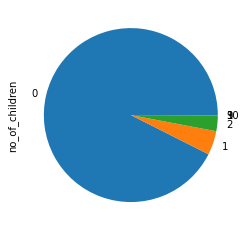

In [ ]:
df['no_of_children'].value_counts().plot(kind="pie")

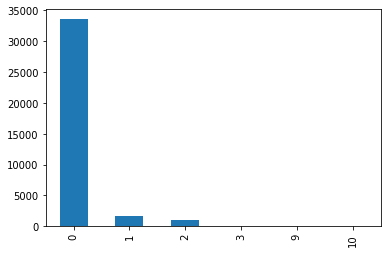

In [ ]:
df['no_of_children'].value_counts().plot(kind="bar")

### 3 - No of weekend nights

In [ ]:
df.no_of_weekend_nights.isnull().sum()

0

In [ ]:
df.no_of_weekend_nights.value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

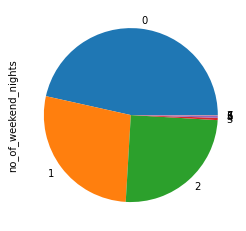

In [ ]:
df['no_of_weekend_nights'].value_counts().plot(kind="pie")

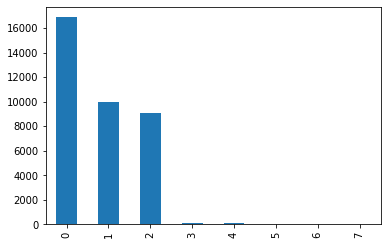

In [ ]:
df['no_of_weekend_nights'].value_counts().plot(kind="bar")

### 4 - No of week nights

In [ ]:
df.no_of_week_nights.isnull().sum()

0

In [ ]:
df.no_of_week_nights.value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

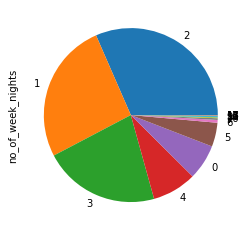

In [ ]:
df['no_of_week_nights'].value_counts().plot(kind="pie")

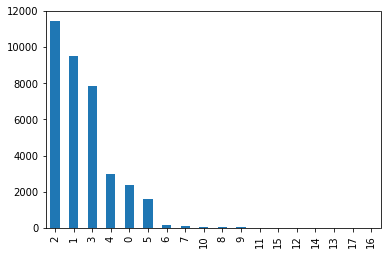

In [ ]:
df['no_of_week_nights'].value_counts().plot(kind="bar")

### 5 - Type of meal plan

In [ ]:
df.type_of_meal_plan.value_counts(ascending=True)

Meal Plan 3         5
Meal Plan 2      3305
Not Selected     5130
Meal Plan 1     27835
Name: type_of_meal_plan, dtype: int64

In [ ]:
df.type_of_meal_plan.isnull().sum()

0

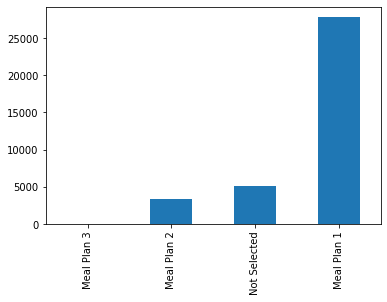

In [ ]:
df['type_of_meal_plan'].value_counts(ascending=True).plot(kind="bar")

### 6 - Required car parking space

In [ ]:
df.required_car_parking_space.isnull().sum()

0

In [ ]:
df.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

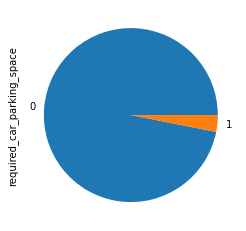

In [ ]:
df['required_car_parking_space'].value_counts().plot(kind="pie")

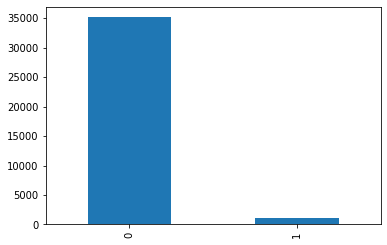

In [ ]:
df['required_car_parking_space'].value_counts().plot(kind="bar")

### 7 - Room type reserved

In [ ]:
df.room_type_reserved.value_counts(ascending=True)

Room_Type 3        7
Room_Type 7      158
Room_Type 5      265
Room_Type 2      692
Room_Type 6      966
Room_Type 4     6057
Room_Type 1    28130
Name: room_type_reserved, dtype: int64

In [ ]:
df.room_type_reserved.isnull().sum()

0

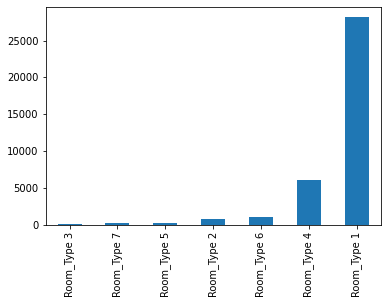

In [ ]:
df['room_type_reserved'].value_counts(ascending=True).plot(kind="bar")

### 8 - Lead time

In [ ]:
df.lead_time.isnull().sum()

0

In [ ]:
df.lead_time.describe()

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

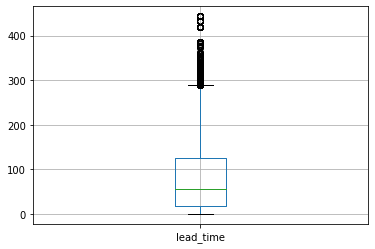

In [ ]:
df.boxplot(column=['lead_time'])

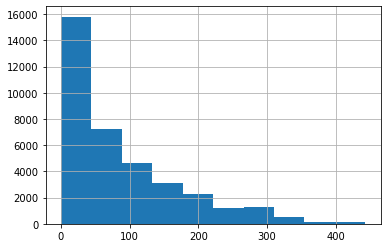

In [ ]:
df.lead_time.hist()

### 9 - Arrival year

In [ ]:
df.arrival_year.isnull().sum()

0

In [ ]:
df.arrival_year.value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

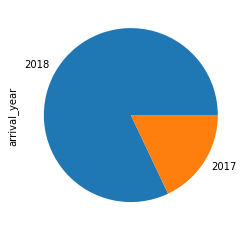

In [ ]:
df['arrival_year'].value_counts().plot(kind="pie")

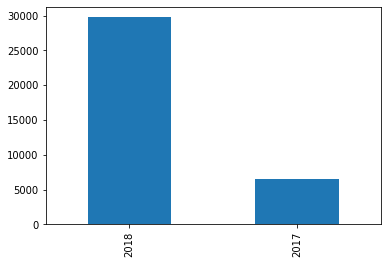

In [ ]:
df['arrival_year'].value_counts().plot(kind="bar")

### 10 - Arrival month

In [ ]:
df.arrival_month.isnull().sum()

0

In [ ]:
df.arrival_month.value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

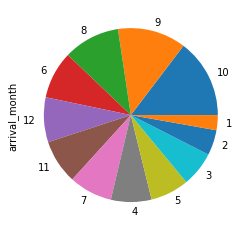

In [ ]:
df['arrival_month'].value_counts().plot(kind="pie")

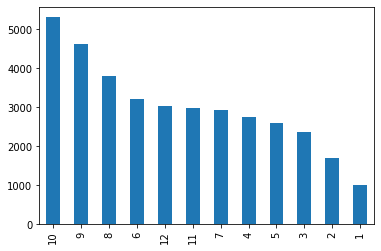

In [ ]:
df['arrival_month'].value_counts().plot(kind="bar")

### 11 - Arrival date

In [ ]:
df.arrival_date.isnull().sum()

0

In [ ]:
df.arrival_date.value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

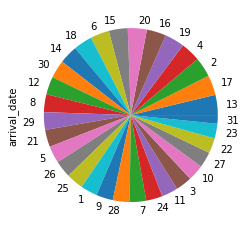

In [ ]:
df['arrival_date'].value_counts().plot(kind="pie")

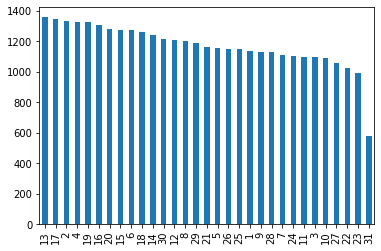

In [ ]:
df['arrival_date'].value_counts().plot(kind="bar")

### 12 - Market segment type

In [ ]:
df.market_segment_type.isnull().sum()

0

In [ ]:
df.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

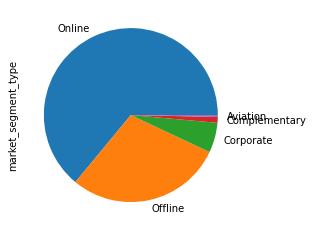

In [ ]:
df['market_segment_type'].value_counts().plot(kind="pie")

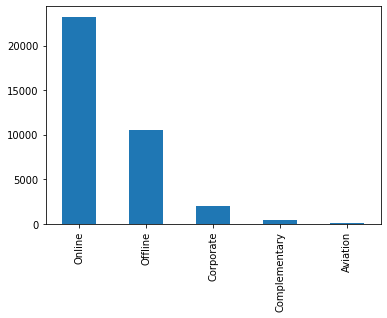

In [ ]:
df['market_segment_type'].value_counts().plot(kind="bar")

### 13 - Repeated guest

In [ ]:
df.repeated_guest.isnull().sum()

0

In [ ]:
df.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

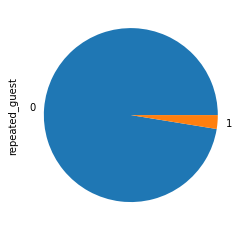

In [ ]:
df['repeated_guest'].value_counts().plot(kind="pie")

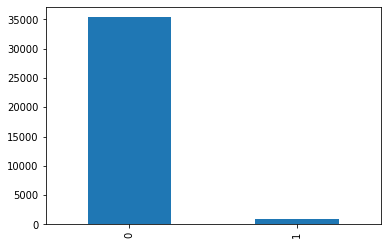

In [ ]:
df['repeated_guest'].value_counts().plot(kind="bar")

### 14 - No of previous cancellations

In [ ]:
df.no_of_previous_cancellations.isnull().sum()

0

In [ ]:
df.no_of_previous_cancellations.describe()

count    36275.000000
mean         0.023349
std          0.368331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: no_of_previous_cancellations, dtype: float64

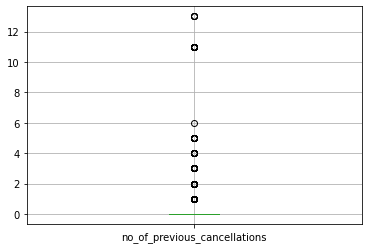

In [ ]:
df.boxplot(column=['no_of_previous_cancellations'])

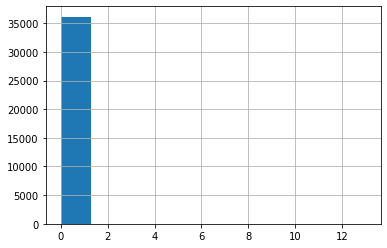

In [ ]:
df.no_of_previous_cancellations.hist()

### 15 - No of previous booking not canceled

In [ ]:
df.no_of_previous_bookings_not_canceled.isnull().sum()

0

In [ ]:
df.no_of_previous_bookings_not_canceled.describe()

count    36275.000000
mean         0.153411
std          1.754171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: no_of_previous_bookings_not_canceled, dtype: float64

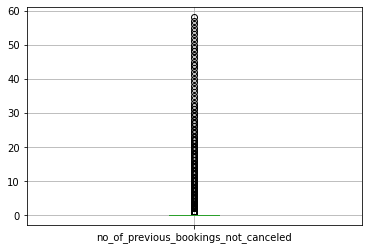

In [ ]:
df.boxplot(column=['no_of_previous_bookings_not_canceled'])

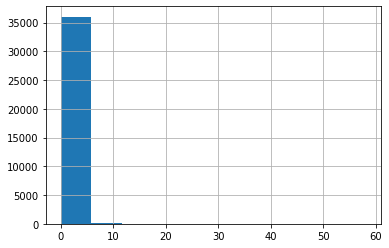

In [ ]:
df.no_of_previous_bookings_not_canceled.hist()

### 16 - Avg price per room

In [ ]:
df.avg_price_per_room.isnull().sum()

0

In [ ]:
df.avg_price_per_room.describe()

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64

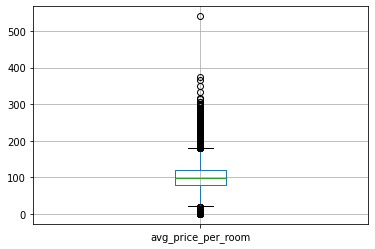

In [ ]:
df.boxplot(column=['avg_price_per_room'])

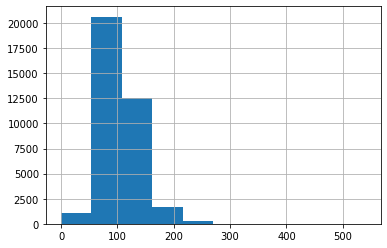

In [ ]:
df.avg_price_per_room.hist()

### 17 - No of speacial request

In [ ]:
df.no_of_special_requests.isnull().sum()

0

In [ ]:
df.no_of_special_requests.describe()

count    36275.000000
mean         0.619655
std          0.786236
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: no_of_special_requests, dtype: float64

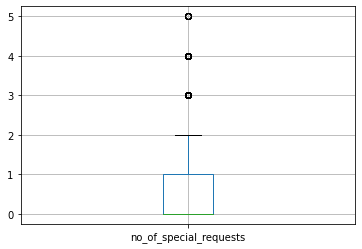

In [ ]:
df.boxplot(column=['no_of_special_requests'])

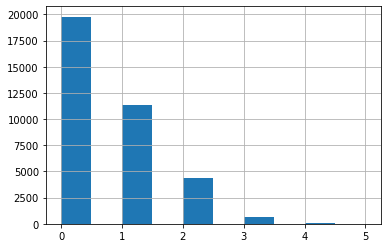

In [ ]:
df.no_of_special_requests.hist()

### 18 - Booking status

In [ ]:
df.booking_status.value_counts(ascending=True)

Canceled        11885
Not_Canceled    24390
Name: booking_status, dtype: int64

In [ ]:
df.booking_status.isnull().sum()

0

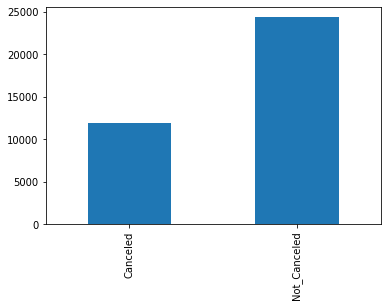

In [ ]:
df['booking_status'].value_counts(ascending=True).plot(kind="bar")

# Pré-processamento

In [ ]:
#tira a coluna bookin_ID
df2 = df.drop(columns='Booking_ID')

## Required car parking space

In [ ]:
df.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df2['required_car_parking_space'])
#print(le.classes_)
#print(label)
df2['required_car_parking_space'] = label
df2.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

## Repeated guest

In [ ]:
df.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df2['repeated_guest'])
#print(le.classes_)
#print(label)
df2['repeated_guest'] = label
df2.repeated_guest.value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

## Booking status

In [ ]:
df2.booking_status.fillna('desconhecido',inplace=True)

In [ ]:
#Transformar nulo para Female que é o valor mais frequente
df2.booking_status.value_counts(ascending=True)

Canceled        11885
Not_Canceled    24390
Name: booking_status, dtype: int64

In [ ]:
dummies = pd.get_dummies(df2['booking_status'])
df2 = pd.concat([df2,dummies],axis='columns')
df2.drop('booking_status', axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

## Market segment type

In [ ]:
df2.market_segment_type.value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

In [ ]:
#transformar categorias em colunas
dummies = pd.get_dummies(df2['market_segment_type'])
df2 = pd.concat([df2,dummies],axis='columns')
df2.drop('market_segment_type', axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

## Room type reserved

In [ ]:
df2.room_type_reserved.value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [ ]:
#transformar categorias em colunas
dummies = pd.get_dummies(df2['room_type_reserved'])
df2 = pd.concat([df2,dummies],axis='columns')
df2.drop('room_type_reserved', axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

## Type of meal plan

In [ ]:
df2.type_of_meal_plan.value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

In [ ]:
#transformar categorias em colunas
dummies = pd.get_dummies(df2['type_of_meal_plan'])
df2 = pd.concat([df2,dummies],axis='columns')
df2.drop('type_of_meal_plan', axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

# Correlação dos dados

## Sem pré_processamento

In [ ]:
df.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


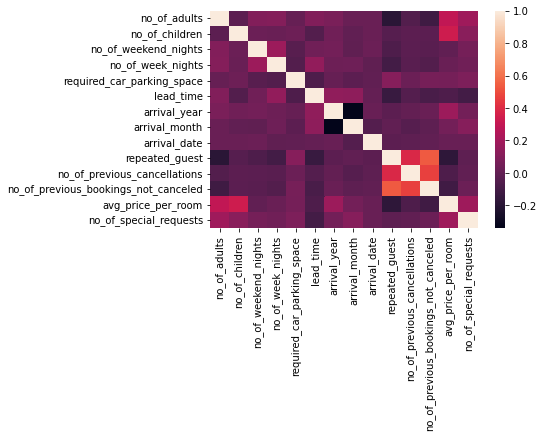

In [ ]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
df.no_of_previous_bookings_not_canceled.corr(df.no_of_previous_cancellations)

0.4681468328550411

## Com pré-processamento

In [ ]:
df2.no_of_previous_bookings_not_canceled.corr(df2.no_of_previous_cancellations)

0.4681468328550411

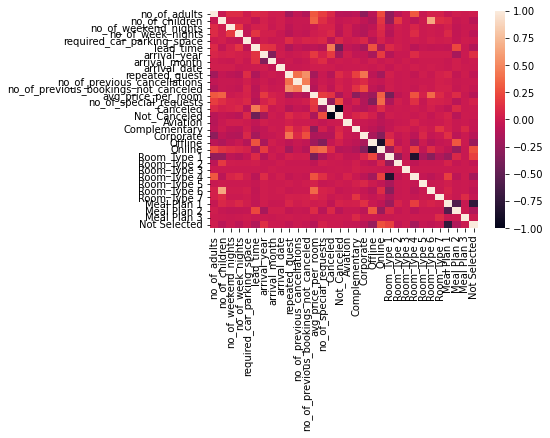

In [ ]:
import seaborn as sns
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Classificação

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

In [ ]:
X = df2.drop('repeated_guest', axis=1)
y = df2.repeated_guest

## Base estratificada

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
def metricas(cm):
  tn = cm[0][0]
  fn = cm[1][0]
  tp = cm[1][1]
  fp = cm[0][1]
  tudo = tn+fn+tp+fp
  acuracia = (tp + tn)/tudo
  precisao_1 = tp/(tp+fp)
  precisao_0 = tn/(tn+fn)
  recall_1 = tp/(tp+fn)
  recall_0 = tn/(tn+fp)
  return acuracia, precisao_1, precisao_0, recall_1, recall_0

## Códigos para cross-validation

In [ ]:
#se for fazer crossvalidation
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
n_folders = 5
cross_val = StratifiedKFold(n_splits=n_folders,shuffle=True,random_state=40)
nome_metricas = ['accuracy', 'precision_micro', 'precision_macro','recall_micro','recall_macro']

In [ ]:
for i, (train_index, test_index) in enumerate(cross_val.split(X, y)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[    0     1     2 ... 36272 36273 36274]
  Test:  index=[    6    11    15 ... 36261 36267 36269]
Fold 1:
  Train: index=[    1     2     3 ... 36271 36272 36273]
  Test:  index=[    0     4     7 ... 36268 36270 36274]
Fold 2:
  Train: index=[    0     1     2 ... 36271 36273 36274]
  Test:  index=[    3     5     9 ... 36259 36260 36272]
Fold 3:
  Train: index=[    0     3     4 ... 36272 36273 36274]
  Test:  index=[    1     2    14 ... 36244 36262 36271]
Fold 4:
  Train: index=[    0     1     2 ... 36271 36272 36274]
  Test:  index=[    8    10    18 ... 36258 36263 36273]


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier()

metricas = cross_validate(modelo_tree, X, y, cv=cross_val, scoring=nome_metricas)
for met in metricas:
    print(f"- {met}:")
    print(f"-- {metricas[met]}")
    print(f"-- {np.mean(metricas[met])} +- {np.std(metricas[met])}\n")

- fit_time:
-- [0.05376148 0.05399394 0.05670929 0.07096982 0.05208874]
-- 0.05750465393066406 +- 0.0068936477634492415

- score_time:
-- [0.02004099 0.02787971 0.02948499 0.02133417 0.02351785]
-- 0.024451541900634765 +- 0.003664169915847741

- test_accuracy:
-- [1. 1. 1. 1. 1.]
-- 1.0 +- 0.0

- test_precision_micro:
-- [1. 1. 1. 1. 1.]
-- 1.0 +- 0.0

- test_precision_macro:
-- [1. 1. 1. 1. 1.]
-- 1.0 +- 0.0

- test_recall_micro:
-- [1. 1. 1. 1. 1.]
-- 1.0 +- 0.0

- test_recall_macro:
-- [1. 1. 1. 1. 1.]
-- 1.0 +- 0.0



## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo_tree = DecisionTreeClassifier(random_state=42)
modelo_tree.fit(X_train,y_train)
y_pred = modelo_tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      8834
           1     1.0000    1.0000    1.0000       235

    accuracy                         1.0000      9069
   macro avg     1.0000    1.0000    1.0000      9069
weighted avg     1.0000    1.0000    1.0000      9069



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelo_nb = GaussianNB()
modelo_nb.fit(X_train,y_train)
y_pred = modelo_nb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     1.0000    0.9547    0.9768      8834
           1     0.3701    1.0000    0.5402       235

    accuracy                         0.9559      9069
   macro avg     0.6850    0.9774    0.7585      9069
weighted avg     0.9837    0.9559    0.9655      9069



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn.fit(X_train,y_train)
y_pred = modelo_knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9890    0.9982    0.9936      8834
           1     0.8954    0.5830    0.7062       235

    accuracy                         0.9874      9069
   macro avg     0.9422    0.7906    0.8499      9069
weighted avg     0.9866    0.9874    0.9861      9069



## SGD

In [ ]:
from sklearn.linear_model import SGDClassifier
modelo_sgd = SGDClassifier(max_iter=1000, tol=1e-3,random_state=42)
modelo_sgd.fit(X_train,y_train)
y_pred = modelo_sgd.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9753    1.0000    0.9875      8834
           1     1.0000    0.0468    0.0894       235

    accuracy                         0.9753      9069
   macro avg     0.9876    0.5234    0.5385      9069
weighted avg     0.9759    0.9753    0.9642      9069



## SVM

In [ ]:
from sklearn.svm import LinearSVC
modelo_svm = LinearSVC(random_state=0, tol=10e-5)
modelo_svm.fit(X_train,y_train)
y_pred = modelo_svm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9878    1.0000    0.9939      8834
           1     1.0000    0.5362    0.6981       235

    accuracy                         0.9880      9069
   macro avg     0.9939    0.7681    0.8460      9069
weighted avg     0.9881    0.9880    0.9862      9069



/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Rede Neural - MPL Cassifier

In [ ]:
from sklearn.neural_network import MLPClassifier
modelo_mlp = MLPClassifier(random_state=1, max_iter=300)
modelo_mlp.fit(X_train,y_train)
y_pred = modelo_mlp.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9995    1.0000    0.9998      8834
           1     1.0000    0.9830    0.9914       235

    accuracy                         0.9996      9069
   macro avg     0.9998    0.9915    0.9956      9069
weighted avg     0.9996    0.9996    0.9996      9069



# Alternativas para desbalanceamento

## Random Under Sampler

0    930
1    930
Name: repeated_guest, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


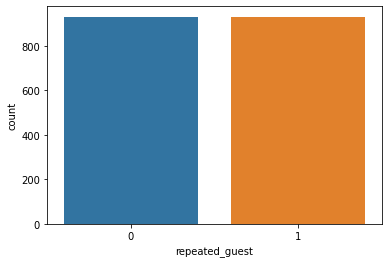

In [ ]:
#retira registros da classe majoritária
from imblearn.under_sampling import RandomUnderSampler, NearMiss
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X,y)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
import seaborn as sns
sns.countplot(y_res);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

## Near Miss

0    930
1    930
Name: repeated_guest, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


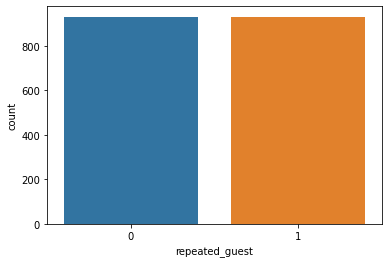

In [ ]:
#clusteriza os dados da classe majoritaria
nm = NearMiss(version=1)
X_res, y_res = nm.fit_resample(X,y)
print(pd.Series(y_res).value_counts())
sns.countplot(y_res);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25, random_state=42)

## Random Over Sampling

0    35345
1    35345
Name: repeated_guest, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


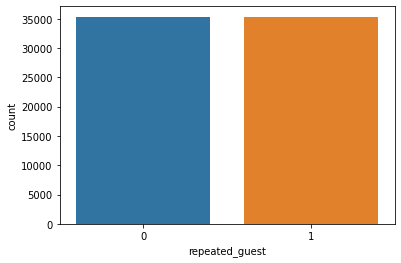

In [ ]:
#colocar aleatoriamente mais dados na classe minoritária
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 32)
X_ros, y_ros = ros.fit_resample(X, y)

# ver o balanceamento das classes
print(pd.Series(y_ros).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_ros);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.25, random_state=42)

## Smote

0    35345
1    35345
Name: repeated_guest, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


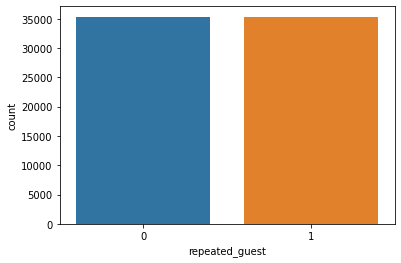

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 32)
X_smote_res, y_smote_res = smote.fit_resample(X,y)

# ver o balanceamento das classes
print(pd.Series(y_smote_res).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_smote_res);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_smote_res, y_smote_res, test_size=0.25, random_state=42)

## Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,random_state=42).fit(X_train, y_train)
y_pred = modelo_tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9633    1.0000    0.9813      8803
           1     1.0000    0.9622    0.9808      8870

    accuracy                         0.9810     17673
   macro avg     0.9817    0.9811    0.9810     17673
weighted avg     0.9817    0.9810    0.9810     17673



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelo_tree = RandomForestClassifier(n_estimators=10,random_state=42)
modelo_tree.fit(X_train,y_train)
y_pred = modelo_tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9989    0.9994    0.9991      8803
           1     0.9994    0.9989    0.9992      8870

    accuracy                         0.9992     17673
   macro avg     0.9992    0.9992    0.9992     17673
weighted avg     0.9992    0.9992    0.9992     17673



## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
modelo_tree = AdaBoostClassifier(n_estimators=1000,random_state=42)
modelo_tree.fit(X_train,y_train)
y_pred = modelo_tree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9991    0.9980    0.9985      8803
           1     0.9980    0.9991    0.9985      8870

    accuracy                         0.9985     17673
   macro avg     0.9985    0.9985    0.9985     17673
weighted avg     0.9985    0.9985    0.9985     17673



## XGBoost

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9882    0.9984    0.9933      8803
           1     0.9984    0.9882    0.9933      8870

    accuracy                         0.9933     17673
   macro avg     0.9933    0.9933    0.9933     17673
weighted avg     0.9933    0.9933    0.9933     17673

